In [1]:
#Importing Libraries
import pandas as pd
from textblob import TextBlob
import re

In [2]:
#Read and load CSV file
df = pd.read_csv('Flipkart_webscraped_data.csv')

In [3]:
# adding product id to existing dataframe
product_id = {
    'iPhone 12' : 'MGJ83HN/A',
    'vivo T3 Ultra' : 'V2426',
    'Google Pixel 8' : 'GPJ41',
    'IQOO Neo9 Pro' : 'I2304',
    'SAMSUNG Galaxy S23 5G' : 'SM-S911BZEBINS'
}

In [4]:
#Rename the column name
df.rename(columns={'product_id' : 'product_name'},inplace = True)

In [5]:
#added product_id
df['product_id'] = df['product_name'].map(product_id)

In [6]:
df['product_name'].unique()

array(['iPhone 12', 'vivo T3 Ultra', 'Google Pixel 8', 'IQOO Neo9 Pro',
       'SAMSUNG Galaxy S23 5G'], dtype=object)

In [7]:
# Checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   rating              527 non-null    int64 
 1   review_summary      527 non-null    object
 2   review_description  527 non-null    object
 3   product_name        527 non-null    object
 4   Price               527 non-null    int64 
 5   product_id          527 non-null    object
dtypes: int64(2), object(4)
memory usage: 24.8+ KB


In [8]:
df.duplicated().sum()

20

In [9]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Checking any blank cell is there using space "  "
blank=[]
for i,j,k,l,m,n,o in df.itertuples():
  if type(j)==str:
    if j.isspace():
      blank.append(i)
df.loc[blank]

,rating,review_summary,review_description,product_name,Price,product_id


In [11]:
# finding str length below 10 count
Word_Length=[]
for i,j,k,l,m,n,o in df.itertuples():
  if type(j)==str:
    if len(j)<10:
      Word_Length.append(i)
df.loc[Word_Length]

,rating,review_summary,review_description,product_name,Price,product_id


In [12]:
# resting index after droping rows
df.reset_index(drop=True, inplace=True)

In [13]:
def Update_review(review):
    # Convert to lowercase
    return review.lower()

# convert all review to lowercase
df['review_description'] = df['review_description'].apply(Update_review)

In [14]:
df.columns

Index(['rating', 'review_summary', 'review_description', 'product_name',
       'Price', 'product_id'],
      dtype='object')

In [15]:
# sentiment analysis using nltk package

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [20]:
# Add sentiment scores to the DataFrame
df['Sentiment_Score'] = df['review_description'].apply(lambda x: sia.polarity_scores (str(x)))

# Extract compound score from sentiment scores
df['compound'] = df['Sentiment_Score'].apply(lambda x: x['compound'])

# Classify sentiment based on the compound score
df['compound_sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Classify product rating
df['rating_sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

# Drop the Sentiment_Score column as it's no longer needed
df = df.drop('Sentiment_Score', axis=1)

In [21]:
# Calculate accuracy of sentiment classification against rating
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['rating_sentiment'], df['compound_sentiment'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.8658777120315582


In [23]:
# sentiment analysis using Textblob package

def get_polarity(text):
    try:   # Create a TextBlob object
        blob = TextBlob(str(text))  # Ensure text is treated as a string
        return blob.sentiment.polarity  # Get the polarity score (-1 to 1)
    except Exception as e:
        return None  # Handle potential errors and return None

# Assuming df is your DataFrame and 'Review' is the column with the text data
df['Polarity'] = df['review_description'].apply(get_polarity)  # First calculate the polarity
df['TextBlob_Sentiment'] = df['Polarity'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Show the DataFrame with the polarity and sentiment columns
print(df)

     rating        review_summary  \
0         5        Classy product   
1         5      Perfect product!   
2         5              Terrific   
3         5     Terrific purchase   
4         5        Simply awesome   
..      ...                   ...   
502       5             Wonderful   
503       5             Just wow!   
504       4  Good quality product   
505       5             Wonderful   
506       1              Horrible   

                                    review_description           product_name  \
0    this is the value for money phone...for flipka...              iPhone 12   
1    the brand is very trustworthy and i got genuin...              iPhone 12   
2    wow superb camera phone.very smooth speed and ...              iPhone 12   
3    awesome phone … value for money.. happy with b...              iPhone 12   
4                amazing phone.in love with this phone              iPhone 12   
..                                                 ...               

In [24]:
# Calculate accuracy of sentiment classification against rating using Polarity of TextBlob_Sentiment
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(df['rating_sentiment'], df['TextBlob_Sentiment'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.8698224852071006


In [25]:
# Save the DataFrame to a CSV file.
df.to_csv('sentiment_analysis_flipkart.csv', index=False)

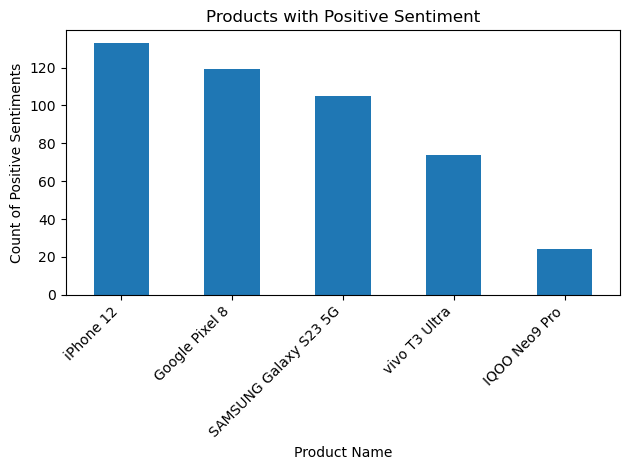

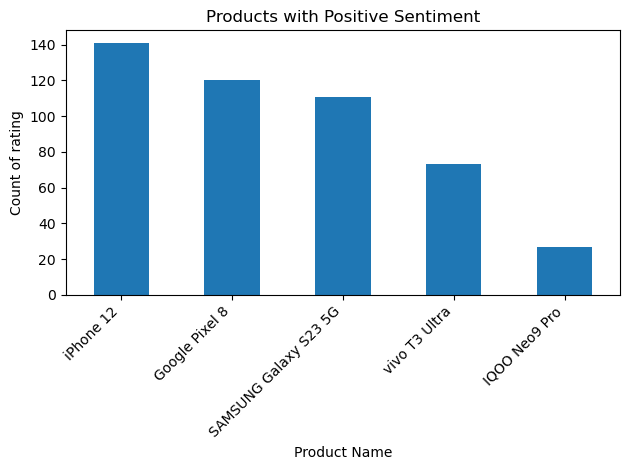

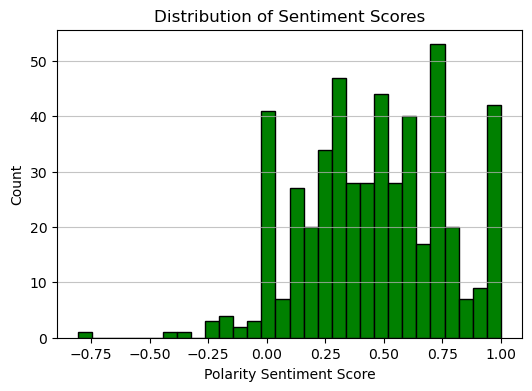

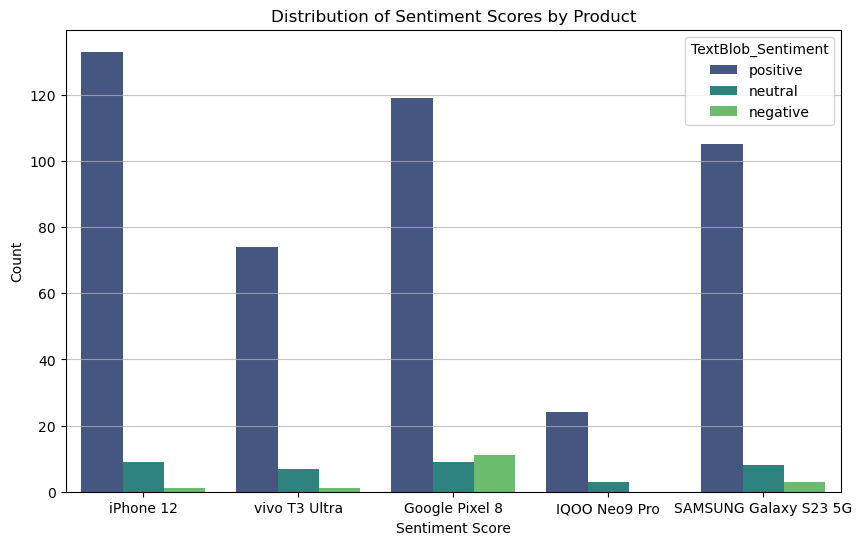

In [31]:
#analyze the data

import matplotlib.pyplot as plt

# Filter for positive sentiment and count occurrences of product names
positive_sentiment_products = df[df['TextBlob_Sentiment'] == 'positive']['product_name'].value_counts()

# Plot the distribution of products with positive sentiment
positive_sentiment_products.plot(kind='bar')
plt.title('Products with Positive Sentiment')
plt.xlabel('Product Name')
plt.ylabel('Count of Positive Sentiments')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()



# Filter for positive sentiment using rating and count occurrences of product names
rating_sentiment_products = df[df['rating_sentiment'] == 'positive']['product_name'].value_counts()

# Plot the distribution of products with positive sentiment
rating_sentiment_products.plot(kind='bar')
plt.title('Products with Positive Sentiment')
plt.xlabel('Product Name')
plt.ylabel('Count of rating')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to prevent label cutoff
plt.show()


# Create a histogram of the 'compound' sentiment scores
plt.figure(figsize=(6, 4))
plt.hist(df['Polarity'], bins=30, color='g', edgecolor='black')
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Polarity Sentiment Score")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.75)
plt.show()


import seaborn as sns

# Count plot to differentiate sentiment by product_name
plt.figure(figsize=(10, 6))
sns.countplot(x="product_name", hue="TextBlob_Sentiment", data=df, palette="viridis")

# Add title and labels
plt.title("Distribution of Sentiment Scores by Product")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")

# Add a grid on the y-axis
plt.grid(axis='y', alpha=0.75)

# Show the plot
plt.show()